In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions
from sklearn.metrics import mean_absolute_error


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("../btcNews_Data.csv")

In [4]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,save lives earn bitcoin with new ems signpos...,future use cases for blockchain technology pr...,land of the rising bitcoin bitcoin,fiat cannot support the new economy we need b...,blockchain alliance bitcoin and law enforceme...,,has released an enterprise ready blockchain...,blockstream to transmit bitcoin data to earth ...,pr ambrosus partners with trek therapeutics t...,goldman sachs technical analyst predicts bitco...,we ve created a telegram channel to display th...,bitcoin s current exchange rate is 4325 46 usd...,cryptocurrency ping tracking,porn star tempts russian prime minister to leg...,bitcoin endures instantaneous flash crash on m...,microsoft press office we ve restored bitcoi...,bangladesh authorities on hunt for bitcoin t...,,us lawmakers eye national crypto regulation ...,pr smart contract platform fabric token raise...,rt lawsuit,assemble protocol asm is now supported on co...,leveraging ongoing investment trend upcoming ...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,the forum s all star ama event,decentralization is key for car innovation to ...,meerkat star suzanne nguyen dreams of bitcoin...,what do you think has segwit been released ye...,good bitcoin bad bitcoin avoiding fraud amp...,uk regulator warns investors bitcoin trading i...,venezuelan bitcoin mining continues despite go...,fisco designed the bond like a regular corpor...,bitcoin cash now commands over 20 of btc s to...,pr robert binning ceo of streamspace to spea...,ukraine proposes law to completely legalize cr...,russia s finance ministry proposes registering...,chinese power company responds to document ind...,pr nuls the global open source platform for b...,pr game machine first blockchain ecosystem ...,south korean regulator supports normal crypt...,digitalx,how to protect yourself against dns attacks wh...,,new party in ukraine to fund itself only with ...,a single operator deploys over 350 new bitcoi...,nigeria s latest total traded volumes figure w...,the next bitcoin cash may 15th upgrade will br...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing t

Looking at the volume column what are the last letters it has

In [5]:
def last_unique_letter(s):
    unique_letters = ''.join(dict.fromkeys(s[::-1]))  # Reverse string and remove duplicates
    return unique_letters[0] if unique_letters else None

In [6]:
# Store the last unique letters in a list
last_unique_letters = [last_unique_letter(entry) for entry in df['vol.']]

In [7]:
list(set(last_unique_letters))

['K', 'M']

In [8]:
## changing the vol. column into numeric - by replace ing K and M with actutal values
df['vol.'] = df['vol.'].apply(functions.convert_to_numeric)

In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.set_index('date')
# Remove '%' and convert 'change %' to a numeric column
df['change %'] = df['change %'].str.replace('%', '').astype(float)

In [10]:
df.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-11,restaurant chain that converted cash reserves ...,igt secured this patent to bolster its indust...,14 new kiosks will be deployed by the bitcoin ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18023.6,18250.5,18288.3,17600.1,111530.0,-1.23


In [11]:
df_n = df[['price', 'open', 'high', 'low', 'vol.', 'change %']]

In [12]:
df_n.sample()

,price,open,high,low,vol.,change %
date,,,,,,
2018-10-25,6507.0,6532.5,6544.8,6491.5,97430.0,-0.36


## Model Development - Model 2

In [13]:
from prophet import Prophet

In [14]:
df_n.reset_index(inplace=True)

df_n.rename(columns={'date': 'ds', 'price': 'y'}, inplace=True)

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/260662738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.rename(columns={'date': 'ds', 'price': 'y'}, inplace=True)


In [15]:
df_n.sample()

,ds,y,open,high,low,vol.,change %
1641,2020-01-16,8726.9,8818.1,8850.0,8605.8,748320.0,-1.04


In [16]:
# Split into training and testing sets (80-20 split)
train_size_fbp = int(len(df_n) * 0.6)
train_fbp = df_n.iloc[:train_size_fbp]
test_fbp = df_n.iloc[train_size_fbp:]

#### Using date, price and open columns

In [17]:

# Initialize the Prophet model
model_fbp = Prophet()
model_fbp.add_regressor('open')

In [18]:
# Fit the model on the training data
model_fbp.fit(train_fbp)

22:43:49 - cmdstanpy - INFO - Chain [1] start processing
22:43:49 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_test = test_fbp[['ds','open']]
# Predict the future values
forecast_fbp = model_fbp.predict(future_test)
# Extract the predicted values for the test period
predictions_fbp = forecast_fbp[['ds', 'yhat']]

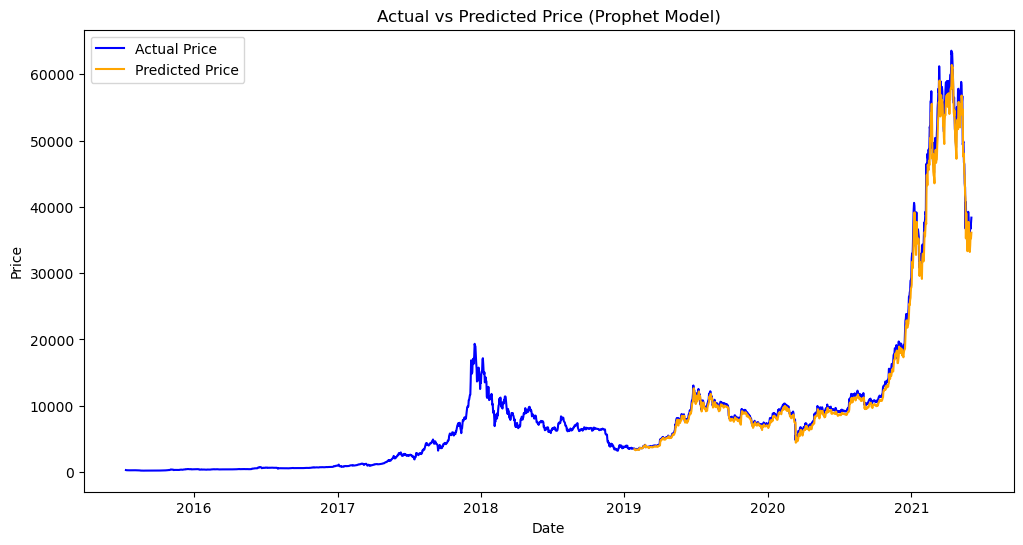

In [20]:
functions.plot_actual_vs_predicted(df_n, predictions_fbp)

In [21]:
functions.calculate_metrics(test_fbp['y'], predictions_fbp['yhat'])

Mean Absolute Error (MAE): 798.7783971171958
Mean Squared Error (MSE): 1701490.2049353854
Root Mean Squared Error (RMSE): 1304.4118233653762
R-squared (R²): 0.993037759151306


{'MAE': 798.7783971171958,
 'MSE': 1701490.2049353854,
 'RMSE': 1304.4118233653762,
 'R²': 0.993037759151306}

In [22]:
functions.calculate_metrics(test_fbp['y'], predictions_fbp['yhat'])

Mean Absolute Error (MAE): 798.7783971171958
Mean Squared Error (MSE): 1701490.2049353854
Root Mean Squared Error (RMSE): 1304.4118233653762
R-squared (R²): 0.993037759151306


{'MAE': 798.7783971171958,
 'MSE': 1701490.2049353854,
 'RMSE': 1304.4118233653762,
 'R²': 0.993037759151306}

#### Model with Lag values of 1

In [23]:

# Create the lagged columns for 'open', 'vol.', and 'change %'
df_n['lag1_open'] = df_n['open'].shift(1)
df_n['lag1_open'] = df_n['open'].shift(1)
df_n['lag1_vol'] = df_n['vol.'].shift(1)
df_n['lag1_change_pct'] = df_n['change %'].shift(1)

# Replace NaN values in lagged columns with 0
df_n[['lag1_open', 'lag1_vol', 'lag1_change_pct']] = df_n[['lag1_open', 'lag1_vol', 'lag1_change_pct']].fillna(0)


/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/601134214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['lag1_open'] = df_n['open'].shift(1)
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/601134214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['lag1_open'] = df_n['open'].shift(1)
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/601134214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [24]:
df_lag = df_n.drop(df_n.index[0])

In [25]:
df_lag.head()

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,292.0,120700.0,6.33
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,310.4,146850.0,-6.47
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,290.4,60620.0,-1.17
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,287.0,59580.0,-1.23
5,2015-07-17,279.6,276.6,280.8,271.2,62120.0,1.10,283.4,121320.0,-2.41


In [26]:
df_lag.corr()

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
ds,1.000000,0.676985,0.676436,0.674831,0.679565,0.197698,0.001425,0.675890,0.198201,-0.000186
y,0.676985,1.000000,0.998515,0.999347,0.999167,-0.024642,0.018122,0.997231,-0.025237,0.015353
open,0.676436,0.998515,1.000000,0.999348,0.998669,-0.023867,-0.017153,0.998510,-0.024207,0.017120
high,0.674831,0.999347,0.999348,1.000000,0.998580,-0.024483,0.001399,0.998139,-0.025243,0.015432
low,0.679565,0.999167,0.998669,0.998580,1.000000,-0.024211,0.005164,0.996929,-0.024003,0.019573
vol.,0.197698,-0.024642,-0.023867,-0.024483,-0.024211,1.000000,-0.004713,-0.023340,0.780029,-0.002079
change %,0.001425,0.018122,-0.017153,0.001399,0.005164,-0.004713,1.000000,-0.015021,-0.029592,-0.050866
lag1_open,0.675890,0.997231,0.998510,0.998139,0.996929,-0.023340,-0.015021,1.000000,-0.023439,-0.018182
lag1_vol,0.198201,-0.025237,-0.024207,-0.025243,-0.024003,0.780029,-0.029592,-0.023439,1.000000,-0.004853
lag1_change_pct,-0.000186,0.015353,0.017120,0.015432,0.019573,-0.002079,-0.050866,-0.018182,-0.004853,1.000000


In [27]:
# Split into training and testing sets (80-20 split)
train_size_fbp_lag = int(len(df_lag) * 0.6)
train_fbp_lag = df_lag.iloc[:train_size_fbp_lag]
test_fbp_lag = df_lag.iloc[train_size_fbp:]

In [28]:
# Initialize the Prophet model
model_fbp_lag = Prophet()
model_fbp_lag.add_regressor('lag1_open')
model_fbp_lag.add_regressor('lag1_vol')
model_fbp_lag.add_regressor('lag1_change_pct')

In [29]:
# Fit the model on the training data
model_fbp_lag.fit(train_fbp_lag)


22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:50 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future_test_lag = test_fbp_lag[['ds','lag1_open','lag1_vol', 'lag1_change_pct']]
# Predict the future values
forecast_fbp_lag = model_fbp_lag.predict(future_test_lag)
# Extract the predicted values for the test period
predictions_fbp_lag = forecast_fbp_lag[['ds', 'yhat']]


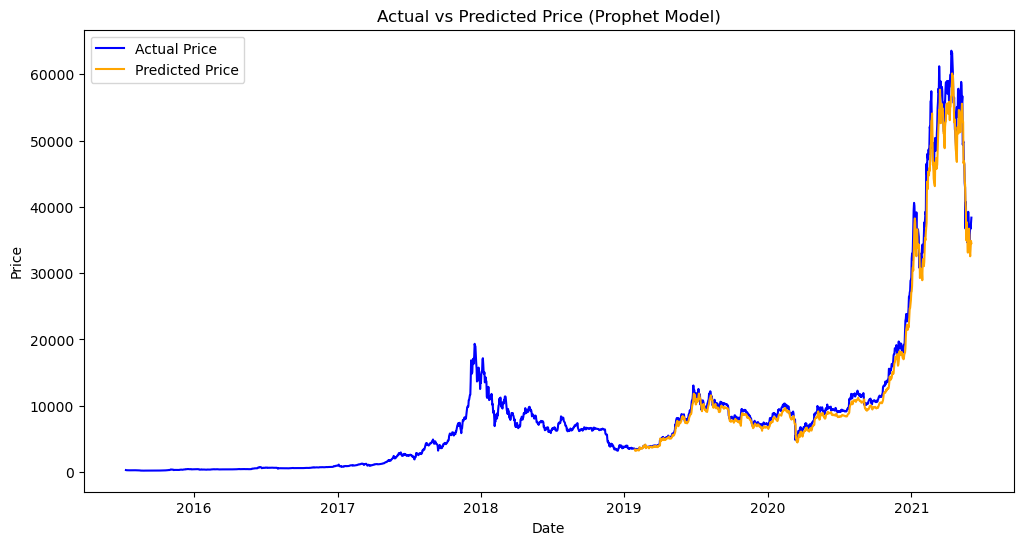

In [31]:
functions.plot_actual_vs_predicted(df_n, predictions_fbp_lag)

In [32]:
functions.calculate_metrics(test_fbp_lag['y'], predictions_fbp_lag['yhat'])

Mean Absolute Error (MAE): 1162.9756619931306
Mean Squared Error (MSE): 3353613.124505406
Root Mean Squared Error (RMSE): 1831.2872861747842
R-squared (R²): 0.9862828749129836


{'MAE': 1162.9756619931306,
 'MSE': 3353613.124505406,
 'RMSE': 1831.2872861747842,
 'R²': 0.9862828749129836}

##### CV on lag features

In [33]:

functions.expanding_window_cv_prophet(df=df_lag, regressors=['lag1_open', 'lag1_vol', 'lag1_change_pct'], 
                                      initial_train_size=int(len(df_lag) * 0.5),
                                      test_size=90
)

22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:50 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2018-09-24 00:00:00: RMSE = 416.17054248951695, MAE = 328.07091417885323


22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:50 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2018-12-23 00:00:00: RMSE = 225.96648548588814, MAE = 179.09386874121705


22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:51 - cmdstanpy - INFO - Chain [1] done processing
22:43:51 - cmdstanpy - INFO - Chain [1] start processing
22:43:51 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2019-03-23 00:00:00: RMSE = 186.7311628750679, MAE = 163.86306357914393


22:43:51 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-21 00:00:00: RMSE = 404.6647291087778, MAE = 306.1164920938227


22:43:51 - cmdstanpy - INFO - Chain [1] done processing
22:43:51 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-09-19 00:00:00: RMSE = 522.5000570768467, MAE = 367.37961344146555


22:43:51 - cmdstanpy - INFO - Chain [1] done processing
22:43:51 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-12-18 00:00:00: RMSE = 378.36225274505995, MAE = 301.6986362303875


22:43:51 - cmdstanpy - INFO - Chain [1] done processing
22:43:52 - cmdstanpy - INFO - Chain [1] start processing
22:43:52 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2020-03-17 00:00:00: RMSE = 422.35191902326767, MAE = 232.4713746358816


22:43:52 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-15 00:00:00: RMSE = 318.7894767940654, MAE = 224.52581377403445


22:43:52 - cmdstanpy - INFO - Chain [1] done processing
22:43:52 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-09-13 00:00:00: RMSE = 279.4490611329277, MAE = 180.4850214595657


22:43:52 - cmdstanpy - INFO - Chain [1] done processing
22:43:52 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-12-12 00:00:00: RMSE = 552.6133706539114, MAE = 374.8757673222807


22:43:53 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-03-12 00:00:00: RMSE = 2653.824884106506, MAE = 2063.531568332848

Average RMSE: 578.3112674083487
Average MAE: 429.2829212535909


(578.3112674083487,
 429.2829212535909,
 [416.17054248951695,
  225.96648548588814,
  186.7311628750679,
  404.6647291087778,
  522.5000570768467,
  378.36225274505995,
  422.35191902326767,
  318.7894767940654,
  279.4490611329277,
  552.6133706539114,
  2653.824884106506],
 [328.07091417885323,
  179.09386874121705,
  163.86306357914393,
  306.1164920938227,
  367.37961344146555,
  301.6986362303875,
  232.4713746358816,
  224.52581377403445,
  180.4850214595657,
  374.8757673222807,
  2063.531568332848])

#### Model with moving average

In [34]:
df_ma = df_n[['ds', 'y', 'open', 'high', 'low', 'vol.', 'change %']]

In [35]:
df_ma.sample()

,ds,y,open,high,low,vol.,change %
1387,2019-05-07,5849.5,5745.5,6019.8,5745.5,955880.0,1.82


In [36]:
# Define the number of days for different periods
one_day = 1
seven_days = 7
one_month = 30  # approximately 30 days in a month
three_months = 90
six_months = 180
one_year = 365

# Simple Moving Averages (SMA) on 'y' (price)
df_ma['SMA_1_day'] = df_ma['y'].rolling(window=one_day).mean()
df_ma['SMA_7_days'] = df_ma['y'].rolling(window=seven_days).mean()
df_ma['SMA_1_month'] = df_ma['y'].rolling(window=one_month).mean()
df_ma['SMA_3_months'] = df_ma['y'].rolling(window=three_months).mean()
df_ma['SMA_6_months'] = df_ma['y'].rolling(window=six_months).mean()
df_ma['SMA_1_year'] = df_ma['y'].rolling(window=one_year).mean()

# Exponential Moving Averages (EMA) on 'y' (price)
df_ma['EMA_1_day'] = df_ma['y'].ewm(span=one_day, adjust=False).mean()
df_ma['EMA_7_days'] = df_ma['y'].ewm(span=seven_days, adjust=False).mean()
df_ma['EMA_1_month'] = df_ma['y'].ewm(span=one_month, adjust=False).mean()
df_ma['EMA_3_months'] = df_ma['y'].ewm(span=three_months, adjust=False).mean()
df_ma['EMA_6_months'] = df_ma['y'].ewm(span=six_months, adjust=False).mean()
df_ma['EMA_1_year'] = df_ma['y'].ewm(span=one_year, adjust=False).mean()

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/229739778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma['SMA_1_day'] = df_ma['y'].rolling(window=one_day).mean()
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/229739778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma['SMA_7_days'] = df_ma['y'].rolling(window=seven_days).mean()


In [37]:
df_ma.sample()

,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
1916,2020-10-17,11362.1,11321.8,11402.7,11274.4,29860.0,0.35,11362.1,11419.457143,10901.673333,11000.988889,10075.148333,9017.830411,11362.1,11338.766595,11025.081814,10720.17178,10159.596648,9401.872249


In [38]:
df_ma.corr()

,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
ds,1.000000,0.676992,0.676444,0.674838,0.679572,0.197799,0.000193,0.676992,0.676463,0.674604,0.682284,0.735878,0.834148,0.676992,0.677201,0.678500,0.696278,0.737306,0.808762
y,0.676992,1.000000,0.998516,0.999347,0.999167,-0.024542,0.017622,1.000000,0.997138,0.984123,0.946849,0.906485,0.842741,1.000000,0.997972,0.987992,0.964788,0.943020,0.914118
open,0.676444,0.998516,1.000000,0.999348,0.998669,-0.023767,-0.017632,0.998516,0.998283,0.985680,0.949385,0.909264,0.845104,0.998516,0.998782,0.989571,0.966935,0.945341,0.916247
high,0.674838,0.999347,0.999348,1.000000,0.998580,-0.024383,0.000911,0.999347,0.998095,0.985453,0.948690,0.908134,0.843275,0.999347,0.998714,0.989336,0.966367,0.944454,0.914980
low,0.679572,0.999167,0.998669,0.998580,1.000000,-0.024110,0.004670,0.999167,0.996788,0.984067,0.947377,0.907582,0.845026,0.999167,0.997587,0.987851,0.965138,0.943846,0.915589
vol.,0.197799,-0.024542,-0.023767,-0.024383,-0.024110,1.000000,-0.004923,-0.024542,-0.023259,-0.021391,-0.015248,0.012629,0.084267,-0.024542,-0.022869,-0.018230,-0.002516,0.028332,0.078361
change %,0.000193,0.017622,-0.017632,0.000911,0.004670,-0.004923,1.000000,0.017622,-0.013508,-0.020840,-0.031789,-0.035888,-0.041793,0.017622,-0.009281,-0.018529,-0.025024,-0.028751,-0.029631
SMA_1_day,0.676992,1.000000,0.998516,0.999347,0.999167,-0.024542,0.017622,1.000000,0.997138,0.984123,0.946849,0.906485,0.842741,1.000000,0.997972,0.987992,0.964788,0.943020,0.914118
SMA_7_days,0.676463,0.997138,0.998283,0.998095,0.996788,-0.023259,-0.013508,0.997138,1.000000,0.989990,0.956047,0.916638,0.851630,0.997138,0.999838,0.993524,0.972574,0.951490,0.922064
SMA_1_month,0.674604,0.984123,0.985680,0.985453,0.984067,-0.021391,-0.020840,0.984123,0.989990,1.000000,0.982911,0.949831,0.881209,0.984123,0.990536,0.999404,0.992315,0.976411,0.947102


In [39]:
df_ma.isna().sum()

ds                0
y                 0
open              0
high              0
low               0
vol.              0
change %          0
SMA_1_day         0
SMA_7_days        6
SMA_1_month      29
SMA_3_months     89
SMA_6_months    179
SMA_1_year      364
EMA_1_day         0
EMA_7_days        0
EMA_1_month       0
EMA_3_months      0
EMA_6_months      0
EMA_1_year        0
dtype: int64

In [40]:
# Split into training and testing sets (80-20 split)
train_size_fbp_ma = int(len(df_ma) * 0.6)
train_fbp_ma = df_ma.iloc[:train_size_fbp_ma]
test_fbp_ma = df_ma.iloc[train_size_fbp_ma:]

In [41]:
# Create the Prophet model
model_fbp_ma = Prophet()

# Add additional regressors
# Adding the selected columns as regressors
ma_regressors = [
    'EMA_1_day',  # Short-term trend
    'EMA_7_days',  # Medium-term trend
    'EMA_3_months'  # Very long-term trend
]
for reg in ma_regressors:
    model_fbp_ma.add_regressor(reg)

# Fit the model
model_fbp_ma.fit(train_fbp_ma)

22:43:53 - cmdstanpy - INFO - Chain [1] start processing
22:43:54 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future_test_ma = test_fbp_ma[
        [
            'ds',
            'EMA_1_day',  # Short-term trend
            'EMA_7_days', 
            'EMA_3_months',  # Long-term trend
        ]
    ]
# Predict the future values
forecast_fbp_ma = model_fbp_ma.predict(future_test_ma)
# Extract the predicted values for the test period
predictions_fbp_ma = forecast_fbp_ma[['ds', 'yhat']]



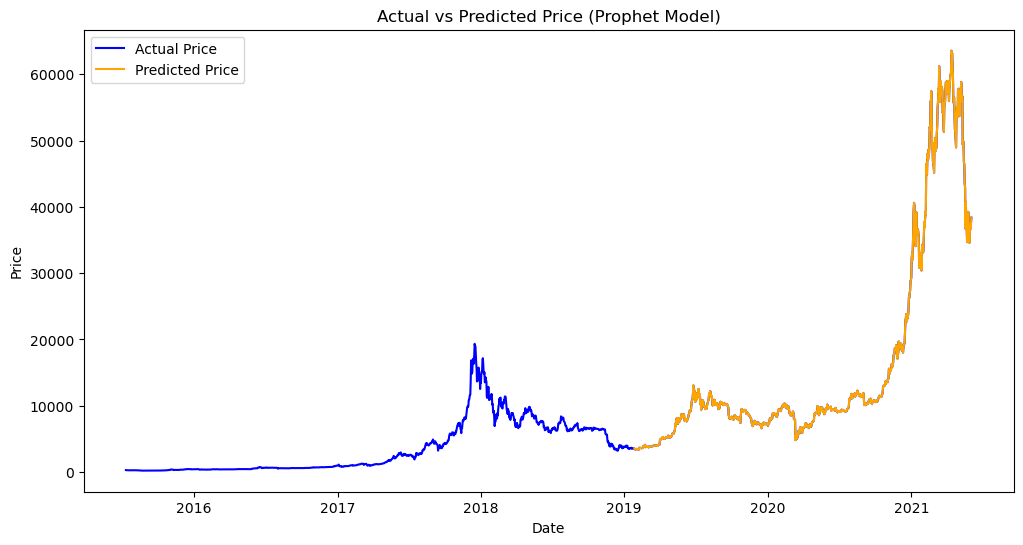

In [43]:
functions.plot_actual_vs_predicted(df_ma, predictions_fbp_ma)

In [44]:
functions.calculate_metrics(test_fbp_ma['y'], predictions_fbp_ma['yhat'])

Mean Absolute Error (MAE): 1.4050239729530334
Mean Squared Error (MSE): 2.599175923837105
Root Mean Squared Error (RMSE): 1.612195994238016
R-squared (R²): 0.9999999893645648


{'MAE': 1.4050239729530334,
 'MSE': 2.599175923837105,
 'RMSE': 1.612195994238016,
 'R²': 0.9999999893645648}

#### CrossValidation of model wiht MA

In [45]:
functions.expanding_window_cv_prophet(df=df_ma, regressors=['EMA_1_day', 'EMA_7_days', 'EMA_3_months'], 
                                      initial_train_size=int(len(df_ma) * 0.5),
                                      test_size=90
)

22:43:54 - cmdstanpy - INFO - Chain [1] start processing
22:43:55 - cmdstanpy - INFO - Chain [1] done processing
22:43:55 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-09-24 00:00:00: RMSE = 0.4441677010941509, MAE = 0.36925219003136994


22:43:56 - cmdstanpy - INFO - Chain [1] done processing
22:43:56 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-12-23 00:00:00: RMSE = 0.9058378643717112, MAE = 0.8644397923943112


22:43:58 - cmdstanpy - INFO - Chain [1] done processing
22:43:58 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-03-23 00:00:00: RMSE = 1.4414900927518652, MAE = 1.378748351282032


22:43:59 - cmdstanpy - INFO - Chain [1] done processing
22:43:59 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-21 00:00:00: RMSE = 0.1960984756515895, MAE = 0.18199509673558573


22:44:00 - cmdstanpy - INFO - Chain [1] done processing
22:44:00 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-09-19 00:00:00: RMSE = 6.238856449362105, MAE = 5.02674194293298


22:44:01 - cmdstanpy - INFO - Chain [1] done processing
22:44:02 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-12-18 00:00:00: RMSE = 1.9523517633209377, MAE = 1.68483605952892


22:44:03 - cmdstanpy - INFO - Chain [1] done processing
22:44:03 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-03-17 00:00:00: RMSE = 0.0805277427290831, MAE = 0.0721032204843646


22:44:05 - cmdstanpy - INFO - Chain [1] done processing
22:44:05 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-15 00:00:00: RMSE = 0.8143448305832787, MAE = 0.7902865498490428


22:44:06 - cmdstanpy - INFO - Chain [1] done processing
22:44:07 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-09-13 00:00:00: RMSE = 1.261336928004154, MAE = 1.088884849394324


22:44:08 - cmdstanpy - INFO - Chain [1] done processing
22:44:08 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-12-12 00:00:00: RMSE = 0.6973454305842879, MAE = 0.6405388955441392


22:44:10 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-03-12 00:00:00: RMSE = 0.6930151839027593, MAE = 0.58957497454309

Average RMSE: 1.3386702238505384
Average MAE: 1.1534001747927418


(1.3386702238505384,
 1.1534001747927418,
 [0.4441677010941509,
  0.9058378643717112,
  1.4414900927518652,
  0.1960984756515895,
  6.238856449362105,
  1.9523517633209377,
  0.0805277427290831,
  0.8143448305832787,
  1.261336928004154,
  0.6973454305842879,
  0.6930151839027593],
 [0.36925219003136994,
  0.8644397923943112,
  1.378748351282032,
  0.18199509673558573,
  5.02674194293298,
  1.68483605952892,
  0.0721032204843646,
  0.7902865498490428,
  1.088884849394324,
  0.6405388955441392,
  0.58957497454309])

In [46]:
from prophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(
    model_fbp_ma,
    initial='365 days',  # Initial training set size
    period='30 days',    # Step size for rolling window
    horizon='90 days'    # Forecast horizon
)

# Calculate performance metrics
# Metrics available: 'mse', 'rmse', 'mae', 'mape', 'coverage'
performance = performance_metrics(cv_results)

# Display the performance metrics
print(performance[['horizon', 'rmse', 'mae', 'mape']])


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/28 [00:00<?, ?it/s]

22:44:10 - cmdstanpy - INFO - Chain [1] start processing
22:44:11 - cmdstanpy - INFO - Chain [1] done processing
22:44:11 - cmdstanpy - INFO - Chain [1] start processing
22:44:12 - cmdstanpy - INFO - Chain [1] done processing
22:44:12 - cmdstanpy - INFO - Chain [1] start processing
22:44:12 - cmdstanpy - INFO - Chain [1] done processing
22:44:12 - cmdstanpy - INFO - Chain [1] start processing
22:44:12 - cmdstanpy - INFO - Chain [1] done processing
22:44:12 - cmdstanpy - INFO - Chain [1] start processing
22:44:13 - cmdstanpy - INFO - Chain [1] done processing
22:44:13 - cmdstanpy - INFO - Chain [1] start processing
22:44:13 - cmdstanpy - INFO - Chain [1] done processing
22:44:14 - cmdstanpy - INFO - Chain [1] start processing
22:44:14 - cmdstanpy - INFO - Chain [1] done processing
22:44:14 - cmdstanpy - INFO - Chain [1] start processing
22:44:15 - cmdstanpy - INFO - Chain [1] done processing
22:44:15 - cmdstanpy - INFO - Chain [1] start processing
22:44:15 - cmdstanpy - INFO - Chain [1]

   horizon       rmse       mae      mape
0   9 days   1.740937  0.740393  0.000136
1  10 days   1.885150  0.802304  0.000150
2  11 days   2.037419  0.865577  0.000163
3  12 days   2.193260  0.930090  0.000175
4  13 days   2.355755  0.995714  0.000188
5  14 days   2.518217  1.061820  0.000199
6  15 days   2.687835  1.128764  0.000210
7  16 days   2.861799  1.197821  0.000220
8  17 days   3.035042  1.266820  0.000231
9  18 days   3.213132  1.336881  0.000242
10 19 days   3.386754  1.407070  0.000252
11 20 days   3.556858  1.476606  0.000264
12 21 days   3.730537  1.548432  0.000277
13 22 days   3.898078  1.616187  0.000290
14 23 days   4.058083  1.681402  0.000303
15 24 days   4.214727  1.746648  0.000318
16 25 days   4.362395  1.809713  0.000332
17 26 days   4.501623  1.870663  0.000346
18 27 days   4.631319  1.926188  0.000359
19 28 days   4.756647  1.980744  0.000373
20 29 days   4.878111  2.035390  0.000386
21 30 days   4.991727  2.086174  0.000397
22 31 days   5.101100  2.139377  0

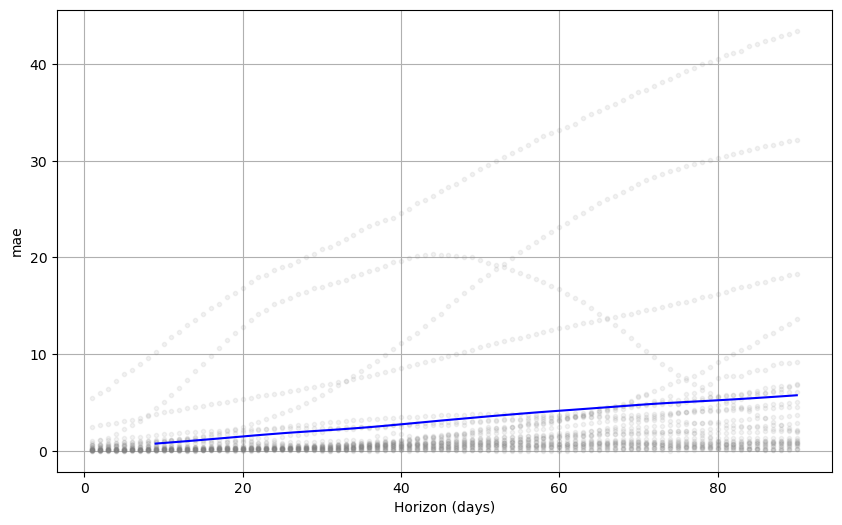

In [47]:
from prophet.plot import plot_cross_validation_metric

# Plot RMSE over the forecast horizon
fig = plot_cross_validation_metric(cv_results, metric='mae')

In [48]:
df_ma.head(1)


,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,310.4,NaN,NaN,NaN,NaN,NaN,310.4,310.4,310.4,310.4,310.4,310.4


## Inital Model with Both Lag and MA

In [49]:
df_n.head(1)

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0


In [50]:
df_lag_ma = pd.merge(
        df_n[['ds', 'y', 'open', 'high', 'low', 'vol.', 'change %', 'lag1_open', 'lag1_vol', 'lag1_change_pct']], 
        df_ma[['ds', 'EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year']], 
        on='ds', 
        how='inner'
    )

In [51]:
df_lag_ma.head(1)

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct,EMA_1_day,EMA_7_days,EMA_3_months,EMA_1_year
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0,310.4,310.4,310.4,310.4


In [52]:
# Split into training and testing sets (80-20 split)
train_size_fbp_lag_ma = int(len(df_lag_ma) * 0.8)
train_fbp_lag_ma = df_lag_ma.iloc[:train_size_fbp_lag_ma]
test_fbp_lag_ma = df_lag_ma.iloc[train_size_fbp_lag_ma:]

In [53]:
# Create the Prophet model
model_fbp_lag_ma = Prophet()

# Add additional regressors
# Adding the selected columns as regressors
lag_ma_regressors = ['lag1_open', 'lag1_vol', 'lag1_change_pct','EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year' ]
for reg in lag_ma_regressors:
    model_fbp_lag_ma.add_regressor(reg)

# Fit the model
model_fbp_lag_ma.fit(train_fbp_lag_ma)

22:44:33 - cmdstanpy - INFO - Chain [1] start processing
22:44:34 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future_test_lag_ma = test_fbp_lag_ma[
        ['ds', 'lag1_open', 'lag1_vol', 'lag1_change_pct','EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year']
    ]
# Predict the future values
forecast_fbp_lag_ma = model_fbp_lag_ma.predict(future_test_lag_ma)
# Extract the predicted values for the test period
predictions_fbp_lag_ma = forecast_fbp_lag_ma[['ds', 'yhat']]


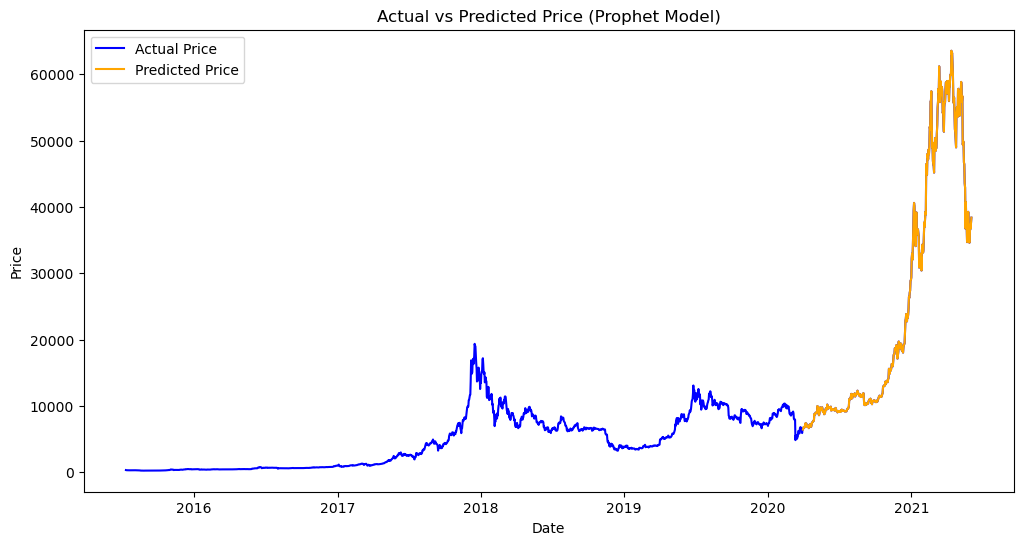

In [55]:
functions.plot_actual_vs_predicted(df_lag_ma, predictions_fbp_lag_ma)

In [56]:
functions.calculate_metrics(test_fbp_lag_ma['y'], predictions_fbp_lag_ma['yhat'])

Mean Absolute Error (MAE): 2.8628475483966698
Mean Squared Error (MSE): 24.923788462343428
Root Mean Squared Error (RMSE): 4.9923730291659325
R-squared (R²): 0.9999999263152084


{'MAE': 2.8628475483966698,
 'MSE': 24.923788462343428,
 'RMSE': 4.9923730291659325,
 'R²': 0.9999999263152084}

##### Cross Validation 

In [57]:
functions.expanding_window_cv_prophet(df=df_lag_ma, regressors=lag_ma_regressors, 
                                      initial_train_size=int(len(df_ma) * 0.5),
                                      test_size=90
)

22:44:34 - cmdstanpy - INFO - Chain [1] start processing
22:44:35 - cmdstanpy - INFO - Chain [1] done processing
22:44:35 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-09-24 00:00:00: RMSE = 0.6560225060465656, MAE = 0.526695853040888


22:44:36 - cmdstanpy - INFO - Chain [1] done processing
22:44:37 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-12-23 00:00:00: RMSE = 0.044819820267476704, MAE = 0.03324913762101763


22:44:38 - cmdstanpy - INFO - Chain [1] done processing
22:44:38 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-03-23 00:00:00: RMSE = 0.41181192463370064, MAE = 0.2931716417043744


22:44:39 - cmdstanpy - INFO - Chain [1] done processing
22:44:39 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-21 00:00:00: RMSE = 2.0042188689928415, MAE = 1.8661182525038282


22:44:40 - cmdstanpy - INFO - Chain [1] done processing
22:44:40 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-09-19 00:00:00: RMSE = 8.616508044589711, MAE = 7.437000054047288


22:44:42 - cmdstanpy - INFO - Chain [1] done processing
22:44:42 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-12-18 00:00:00: RMSE = 1.6770275173227813, MAE = 1.559763470949555


22:44:43 - cmdstanpy - INFO - Chain [1] done processing
22:44:44 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-03-17 00:00:00: RMSE = 0.3254162386413594, MAE = 0.24550146095390218


22:44:45 - cmdstanpy - INFO - Chain [1] done processing
22:44:45 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-15 00:00:00: RMSE = 1.23823947644236, MAE = 1.232043265595621


22:44:47 - cmdstanpy - INFO - Chain [1] done processing
22:44:47 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-09-13 00:00:00: RMSE = 0.17806128883601466, MAE = 0.14654647816144764


22:44:48 - cmdstanpy - INFO - Chain [1] done processing
22:44:49 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-12-12 00:00:00: RMSE = 0.3693972488463653, MAE = 0.3317122288163672


22:44:50 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-03-12 00:00:00: RMSE = 0.5628444313208952, MAE = 0.42999599826018514

Average RMSE: 1.462215215085461
Average MAE: 1.2819816219685884


(1.462215215085461,
 1.2819816219685884,
 [0.6560225060465656,
  0.044819820267476704,
  0.41181192463370064,
  2.0042188689928415,
  8.616508044589711,
  1.6770275173227813,
  0.3254162386413594,
  1.23823947644236,
  0.17806128883601466,
  0.3693972488463653,
  0.5628444313208952],
 [0.526695853040888,
  0.03324913762101763,
  0.2931716417043744,
  1.8661182525038282,
  7.437000054047288,
  1.559763470949555,
  0.24550146095390218,
  1.232043265595621,
  0.14654647816144764,
  0.3317122288163672,
  0.42999599826018514])

In [58]:
cv_results_lag_ma = cross_validation(
    model_fbp_lag_ma,
    initial='365.25 days',  # Initial training set size
    period='30 days',    # Step size for rolling window
    horizon='90 days'    # Forecast horizon
)

# Calculate performance metrics
# Metrics available: 'mse', 'rmse', 'mae', 'mape', 'coverage'
performance_lag_ma = performance_metrics(cv_results_lag_ma)

# Display the performance metrics
print(performance_lag_ma[['horizon', 'rmse', 'mae', 'mape']])

  0%|          | 0/43 [00:00<?, ?it/s]

22:44:50 - cmdstanpy - INFO - Chain [1] start processing
22:44:51 - cmdstanpy - INFO - Chain [1] done processing
22:44:51 - cmdstanpy - INFO - Chain [1] start processing
22:44:51 - cmdstanpy - INFO - Chain [1] done processing
22:44:51 - cmdstanpy - INFO - Chain [1] start processing
22:44:52 - cmdstanpy - INFO - Chain [1] done processing
22:44:52 - cmdstanpy - INFO - Chain [1] start processing
22:44:52 - cmdstanpy - INFO - Chain [1] done processing
22:44:52 - cmdstanpy - INFO - Chain [1] start processing
22:44:53 - cmdstanpy - INFO - Chain [1] done processing
22:44:53 - cmdstanpy - INFO - Chain [1] start processing
22:44:53 - cmdstanpy - INFO - Chain [1] done processing
22:44:53 - cmdstanpy - INFO - Chain [1] start processing
22:44:54 - cmdstanpy - INFO - Chain [1] done processing
22:44:54 - cmdstanpy - INFO - Chain [1] start processing
22:44:55 - cmdstanpy - INFO - Chain [1] done processing
22:44:55 - cmdstanpy - INFO - Chain [1] start processing
22:44:55 - cmdstanpy - INFO - Chain [1]

   horizon       rmse        mae      mape
0   9 days   1.502752   0.635827  0.000104
1  10 days   1.720371   0.707924  0.000116
2  11 days   1.968281   0.787161  0.000130
3  12 days   2.236106   0.867928  0.000144
4  13 days   2.526906   0.952954  0.000159
5  14 days   2.840205   1.051265  0.000176
6  15 days   3.174144   1.158372  0.000194
7  16 days   3.510809   1.269507  0.000212
8  17 days   3.854133   1.381496  0.000230
9  18 days   4.204026   1.496786  0.000249
10 19 days   4.559903   1.614214  0.000269
11 20 days   4.924937   1.736569  0.000289
12 21 days   5.292450   1.864314  0.000310
13 22 days   5.662990   1.993756  0.000332
14 23 days   6.026237   2.117420  0.000352
15 24 days   6.385577   2.236369  0.000372
16 25 days   6.748600   2.363752  0.000393
17 26 days   7.110031   2.490201  0.000414
18 27 days   7.472326   2.618292  0.000435
19 28 days   7.838809   2.747768  0.000457
20 29 days   8.208452   2.876939  0.000480
21 30 days   8.588629   3.007715  0.000501
22 31 days 

### Radomly Searching best Lag featuers to get best result (Just Lag)

In [59]:
df_lag_new = df_n[['ds', 'y', 'open',	'high',	'low',	'vol.',	'change %']]


In [60]:
df_lag_new.sample()

,ds,y,open,high,low,vol.,change %
48,2015-08-30,228.4,228.5,232.3,225.4,39810.0,-0.04


In [61]:
lag_days = 7

# Creating lagged columns for 7 days
for lag in range(1, lag_days + 1):
    df_lag_new[f'lag{lag}_y'] = df_lag_new['y'].shift(lag)
    df_lag_new[f'lag{lag}_open'] = df_lag_new['open'].shift(lag)
    df_lag_new[f'lag{lag}_vol'] = df_lag_new['vol.'].shift(lag)
    df_lag_new[f'lag{lag}_change_pct'] = df_lag_new['change %'].shift(lag)

# Replace NaN values in all lagged columns with 0
lagged_columns = [f'lag{lag}_y' for lag in range(1, lag_days + 1)] + \
                 [f'lag{lag}_open' for lag in range(1, lag_days + 1)] + \
                 [f'lag{lag}_vol' for lag in range(1, lag_days + 1)] + \
                 [f'lag{lag}_change_pct' for lag in range(1, lag_days + 1)]

df_lag_new[lagged_columns] = df_lag_new[lagged_columns].fillna(0)

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/1179594292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lag_new[f'lag{lag}_y'] = df_lag_new['y'].shift(lag)
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/1179594292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lag_new[f'lag{lag}_open'] = df_lag_new['open'].shift(lag)


In [62]:
df_lag_new.sample()

,ds,y,open,high,low,vol.,change %,lag1_y,lag1_open,lag1_vol,lag1_change_pct,lag2_y,lag2_open,lag2_vol,lag2_change_pct,lag3_y,lag3_open,lag3_vol,lag3_change_pct,lag4_y,lag4_open,lag4_vol,lag4_change_pct,lag5_y,lag5_open,lag5_vol,lag5_change_pct,lag6_y,lag6_open,lag6_vol,lag6_change_pct,lag7_y,lag7_open,lag7_vol,lag7_change_pct
769,2017-08-27,4345.8,4352.3,4408.2,4321.1,42520.0,-0.15,4352.3,4364.4,46160.0,-0.28,4364.4,4318.4,82900.0,1.07,4318.4,4141.1,72360.0,4.28,4141.1,4089.7,96650.0,1.26,4089.7,4005.1,169140.0,2.11,4005.1,4066.6,90650.0,-1.51,4066.6,4150.5,70160.0,-2.02


In [65]:
import random
# Split into training and testing sets (80-20 split)
train_size_fbp_lag = int(len(df_lag_new) * 0.6)
train_fbp_lag = df_lag_new.iloc[:train_size_fbp_lag]
test_fbp_lag = df_lag_new.iloc[train_size_fbp_lag:]

# Initialize a list to store MAE results and a set to track unique combinations
mae_results = []
unique_combinations = set()

# Loop to create unique random combinations of lagged regressors
while len(unique_combinations) < 100:  # Adjust this number for more combinations
    num_columns = random.randint(1, 3)  # Randomly select 1 to 3 columns
    regressors = tuple(random.sample(lagged_columns, num_columns))  # Randomly select columns

    if regressors in unique_combinations:
        continue  # Skip if this combination has already been used

    unique_combinations.add(regressors)  # Add the combination to the set

    # Initialize the Prophet model
    model_fbp_lag = Prophet()

    # Add all valid regressors
    for reg in regressors:
        model_fbp_lag.add_regressor(reg)

    # Fit the model on the training data
    model_fbp_lag.fit(train_fbp_lag)

    # Make predictions on the test set
    future = model_fbp_lag.make_future_dataframe(periods=len(test_fbp_lag))
    
    # Adding regressor values to the future DataFrame
    for reg in regressors:
        if reg in df_lag_new.columns:  # Check if the regressor exists
            future[reg] = df_lag_new[reg].values  # Add regressor values

    # Predict with the model
    forecast = model_fbp_lag.predict(future)

    # Calculate MAE
    y_true = test_fbp_lag['y']
    y_pred = forecast['yhat'].tail(len(test_fbp_lag))  # Get predictions for the test set
    mae = mean_absolute_error(y_true, y_pred)

    # Store MAE result
    mae_results.append((regressors, mae))

# Sort results by MAE
mae_results.sort(key=lambda x: x[1])

# Print top 5 models with lowest MAE
print("Top 5 models with lowest MAE:")
for regressors, mae in mae_results[:5]:
    print(f"Regressors: {regressors}, MAE: {mae:.4f}")

23:12:19 - cmdstanpy - INFO - Chain [1] start processing
23:12:19 - cmdstanpy - INFO - Chain [1] done processing
23:12:20 - cmdstanpy - INFO - Chain [1] start processing
23:12:20 - cmdstanpy - INFO - Chain [1] done processing
23:12:20 - cmdstanpy - INFO - Chain [1] start processing
23:12:21 - cmdstanpy - INFO - Chain [1] done processing
23:12:21 - cmdstanpy - INFO - Chain [1] start processing
23:12:21 - cmdstanpy - INFO - Chain [1] done processing
23:12:21 - cmdstanpy - INFO - Chain [1] start processing
23:12:22 - cmdstanpy - INFO - Chain [1] done processing
23:12:22 - cmdstanpy - INFO - Chain [1] start processing
23:12:22 - cmdstanpy - INFO - Chain [1] done processing
23:12:22 - cmdstanpy - INFO - Chain [1] start processing
23:12:23 - cmdstanpy - INFO - Chain [1] done processing
23:12:23 - cmdstanpy - INFO - Chain [1] start processing
23:12:23 - cmdstanpy - INFO - Chain [1] done processing
23:12:24 - cmdstanpy - INFO - Chain [1] start processing
23:12:24 - cmdstanpy - INFO - Chain [1]

Top 5 models with lowest MAE:
Regressors: ('lag7_open', 'lag1_y'), MAE: 789.0975
Regressors: ('lag6_y', 'lag1_y', 'lag5_y'), MAE: 808.2487
Regressors: ('lag1_y', 'lag2_open', 'lag6_open'), MAE: 811.8588
Regressors: ('lag1_y', 'lag6_vol', 'lag7_open'), MAE: 825.8756
Regressors: ('lag2_vol', 'lag3_open', 'lag1_y'), MAE: 850.3179


### Radomly Searching best Moving Average featuers to get best result (Just Moving Average) 

In [66]:
df_ma_new  = df_ma.copy()

In [67]:
df_ma_new.head()

,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,310.4,NaN,NaN,NaN,NaN,NaN,310.4,310.4000,310.400000,310.400000,310.400000,310.400000
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,290.4,NaN,NaN,NaN,NaN,NaN,290.4,305.4000,309.109677,309.960440,310.179006,310.290710
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,287.0,NaN,NaN,NaN,NaN,NaN,287.0,300.8000,307.683247,309.455815,309.922884,310.163439
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,283.4,NaN,NaN,NaN,NaN,NaN,283.4,296.4500,306.116586,308.883159,309.629813,310.017190
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,276.6,NaN,NaN,NaN,NaN,NaN,276.6,291.4875,304.212290,308.173639,309.264843,309.834583


In [68]:
ma_columns = [
    'SMA_1_day', 'SMA_7_days', 'SMA_1_month', 'SMA_3_months', 'SMA_6_months',
    'EMA_1_day', 'EMA_7_days', 'EMA_1_month', 'EMA_3_months', 'EMA_6_months'
]

In [69]:
df_ma_new[ma_columns] = df_ma_new[ma_columns].fillna(0)

In [70]:
# Split into training and testing sets (80-20 split)
train_size_fbp_ma = int(len(df_ma_new) * 0.6)
train_fbp_ma = df_ma_new.iloc[:train_size_fbp_ma]
test_fbp_ma = df_ma_new.iloc[train_size_fbp_ma:]

# Initialize a list to store MAE results and a set to track unique combinations
mae_results = []
unique_combinations = set()

# Loop to create unique random combinations of lagged regressors
while len(unique_combinations) < 100:  # Adjust this number for more combinations
    num_columns = random.randint(1, 3)  # Randomly select 1 to 3 columns
    regressors = tuple(random.sample(ma_columns, num_columns))  # Randomly select columns

    if regressors in unique_combinations:
        continue  # Skip if this combination has already been used

    unique_combinations.add(regressors)  # Add the combination to the set

    # Initialize the Prophet model
    model_fbp_ma_new = Prophet()

    # Add all valid regressors
    for reg in regressors:
        model_fbp_ma_new.add_regressor(reg)

    # Fit the model on the training data
    model_fbp_ma_new.fit(train_fbp_ma)

    # Make predictions on the test set
    future = model_fbp_ma_new.make_future_dataframe(periods=len(test_fbp_ma))
    
    # Adding regressor values to the future DataFrame
    for reg in regressors:
        if reg in df_ma_new.columns:  # Check if the regressor exists
            future[reg] = df_ma_new[reg].values  # Add regressor values

    # Predict with the model
    forecast = model_fbp_ma_new.predict(future)

    # Calculate MAE
    y_true = test_fbp_ma['y']
    y_pred = forecast['yhat'].tail(len(test_fbp_ma))  # Get predictions for the test set
    mae = mean_absolute_error(y_true, y_pred)

    # Store MAE result
    mae_results.append((regressors, mae))

# Sort results by MAE
mae_results.sort(key=lambda x: x[1])

# Print top 5 models with lowest MAE
print("Top 5 models with lowest MAE:")
for regressors, mae in mae_results[:5]:
    print(f"Regressors: {regressors}, MAE: {mae:.4f}")

23:13:16 - cmdstanpy - INFO - Chain [1] start processing
23:13:17 - cmdstanpy - INFO - Chain [1] done processing
23:13:17 - cmdstanpy - INFO - Chain [1] start processing
23:13:17 - cmdstanpy - INFO - Chain [1] done processing
23:13:18 - cmdstanpy - INFO - Chain [1] start processing
23:13:18 - cmdstanpy - INFO - Chain [1] done processing
23:13:18 - cmdstanpy - INFO - Chain [1] start processing
23:13:18 - cmdstanpy - INFO - Chain [1] done processing
23:13:19 - cmdstanpy - INFO - Chain [1] start processing
23:13:20 - cmdstanpy - INFO - Chain [1] done processing
23:13:20 - cmdstanpy - INFO - Chain [1] start processing
23:13:21 - cmdstanpy - INFO - Chain [1] done processing
23:13:21 - cmdstanpy - INFO - Chain [1] start processing
23:13:21 - cmdstanpy - INFO - Chain [1] done processing
23:13:22 - cmdstanpy - INFO - Chain [1] start processing
23:13:22 - cmdstanpy - INFO - Chain [1] done processing
23:13:22 - cmdstanpy - INFO - Chain [1] start processing
23:13:23 - cmdstanpy - INFO - Chain [1]

Top 5 models with lowest MAE:
Regressors: ('SMA_1_day', 'SMA_7_days'), MAE: 0.1187
Regressors: ('EMA_1_day', 'SMA_7_days'), MAE: 0.1187
Regressors: ('SMA_1_day', 'EMA_7_days'), MAE: 0.3578
Regressors: ('EMA_1_day', 'EMA_7_days'), MAE: 0.3578
Regressors: ('EMA_1_day', 'SMA_3_months'), MAE: 0.4265


### Radomly Searching best Moving Average and Lag featuers to get best result(Both lag and MA)

In [71]:
df_ma_lag_new = df_n[['ds', 'y', 'open', 'high', 'low', 'vol.', 'change %']]

In [72]:
# Define the number of days for different periods
periods = {
    '7_days': 7,
    '1_month': 30,  
    '3_months': 90,
    '6_months': 180
}

# List to store moving average column names
ma_columns = []

# Calculate Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
for period_name, window in periods.items():
    # Calculate SMA
    sma_column = f'SMA_{period_name}'
    df_ma_lag_new[sma_column] = df_ma_lag_new['y'].rolling(window=window).mean()
    ma_columns.append(sma_column)
    
    # Calculate EMA
    ema_column = f'EMA_{period_name}'
    df_ma_lag_new[ema_column] = df_ma_lag_new['y'].ewm(span=window, adjust=False).mean()
    ma_columns.append(ema_column)

# Fill null values with 0 for all moving average columns
df_ma_lag_new[ma_columns] = df_ma_lag_new[ma_columns].fillna(0)



/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/953504311.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma_lag_new[sma_column] = df_ma_lag_new['y'].rolling(window=window).mean()
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_38053/953504311.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma_lag_new[ema_column] = df_ma_lag_new['y'].ewm(span=window, adjust=False).mean()


In [73]:
df_ma_lag_new.head()

,ds,y,open,high,low,vol.,change %,SMA_7_days,EMA_7_days,SMA_1_month,EMA_1_month,SMA_3_months,EMA_3_months,SMA_6_months,EMA_6_months
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,310.4000,0.0,310.400000,0.0,310.400000,0.0,310.400000
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,0.0,305.4000,0.0,309.109677,0.0,309.960440,0.0,310.179006
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,0.0,300.8000,0.0,307.683247,0.0,309.455815,0.0,309.922884
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,0.0,296.4500,0.0,306.116586,0.0,308.883159,0.0,309.629813
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,0.0,291.4875,0.0,304.212290,0.0,308.173639,0.0,309.264843


In [74]:
df_combined = pd.merge(df_lag_new, df_ma_lag_new[ma_columns + ['ds']], on='ds', how='inner')

In [75]:
df_combined.head()

,ds,y,open,high,low,vol.,change %,lag1_y,lag1_open,lag1_vol,lag1_change_pct,lag2_y,lag2_open,lag2_vol,lag2_change_pct,lag3_y,lag3_open,lag3_vol,lag3_change_pct,lag4_y,lag4_open,lag4_vol,lag4_change_pct,lag5_y,lag5_open,lag5_vol,lag5_change_pct,lag6_y,lag6_open,lag6_vol,lag6_change_pct,lag7_y,lag7_open,lag7_vol,lag7_change_pct,SMA_7_days,EMA_7_days,SMA_1_month,EMA_1_month,SMA_3_months,EMA_3_months,SMA_6_months,EMA_6_months
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.4000,0.0,310.400000,0.0,310.400000,0.0,310.400000
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.4000,0.0,309.109677,0.0,309.960440,0.0,310.179006
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.8000,0.0,307.683247,0.0,309.455815,0.0,309.922884
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,287.0,290.4,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.4500,0.0,306.116586,0.0,308.883159,0.0,309.629813
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,283.4,287.0,59580.0,-1.23,287.0,290.4,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.4875,0.0,304.212290,0.0,308.173639,0.0,309.264843


In [76]:
import random
from sklearn.metrics import mean_absolute_error


# Define the number of unique combinations to explore
max_combinations = 200

# Split into training and testing sets for MA
train_size_fbp_ma = int(len(df_combined) * 0.6)
train_fbp_ma = df_ma_new.iloc[:train_size_fbp_ma]
test_fbp_ma = df_ma_new.iloc[train_size_fbp_ma:]

# Split into training and testing sets for Lag
train_size_fbp_lag = int(len(df_combined) * 0.6)
train_fbp_lag = df_combined.iloc[:train_size_fbp_lag]
test_fbp_lag = df_combined.iloc[train_size_fbp_lag:]

# Initialize a list to store MAE results and a set to track unique combinations
mae_results = []
unique_combinations = set()

# Combine lagged and MA columns
combined_columns = lagged_columns + ma_columns

# Loop to create unique random combinations of lagged and MA regressors
while len(unique_combinations) < max_combinations:  # Adjust this number for more combinations
    num_columns = random.randint(1, 3)  # Randomly select 1 to 3 columns
    regressors = tuple(random.sample(combined_columns, num_columns))  # Randomly select columns

    if regressors in unique_combinations:
        continue  # Skip if this combination has already been used

    unique_combinations.add(regressors)  # Add the combination to the set

    # Initialize the Prophet model
    model_fbp_combined = Prophet()

    # Add all valid regressors
    for reg in regressors:
        model_fbp_combined.add_regressor(reg)

    # Fit the model on the training data (for lagged regressors)
    model_fbp_combined.fit(train_fbp_lag)

    # Make predictions on the test set
    future = model_fbp_combined.make_future_dataframe(periods=len(test_fbp_lag))

    # Adding regressor values to the future DataFrame
    for reg in regressors:
        if reg in df_combined.columns:  # Check if the regressor exists
            future[reg] = df_combined[reg].values  # Add regressor values

    # Predict with the model
    forecast = model_fbp_combined.predict(future)

    # Calculate MAE
    y_true = test_fbp_lag['y']
    y_pred = forecast['yhat'].tail(len(test_fbp_lag))  # Get predictions for the test set
    mae = mean_absolute_error(y_true, y_pred)

    # Store MAE result
    mae_results.append((regressors, mae))

# Sort results by MAE
mae_results.sort(key=lambda x: x[1])

# Print top 5 models with lowest MAE
print("Top 5 models with lowest MAE from lagged and MA regressors:")
for regressors, mae in mae_results[:5]:
    print(f"Regressors: {regressors}, MAE: {mae:.4f}")


23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:49 - cmdstanpy - INFO - Chain [1] done processing
23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:49 - cmdstanpy - INFO - Chain [1] done processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:50 - cmdstanpy - INFO - Chain [1] done processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] done processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] done processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
23:14:52 - cmdstanpy - INFO - Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
23:14:53 - cmdstanpy - INFO - Chain [1] start processing
23:14:53 - cmdstanpy - INFO - Chain [1] done processing
23:14:53 - cmdstanpy - INFO - Chain [1] start processing
23:14:53 - cmdstanpy - INFO - Chain [1]

Top 5 models with lowest MAE from lagged and MA regressors:
Regressors: ('lag5_open', 'EMA_7_days', 'lag3_vol'), MAE: 422.6045
Regressors: ('lag7_vol', 'lag5_y', 'EMA_7_days'), MAE: 502.8733
Regressors: ('lag5_y', 'EMA_7_days'), MAE: 521.4636
Regressors: ('EMA_7_days', 'lag3_y', 'lag5_open'), MAE: 584.2498
Regressors: ('EMA_7_days', 'lag7_vol'), MAE: 620.6567


### Final Model - After Randomly Searching

In [77]:
train_size_fbp_f = int(len(df_combined) * 0.6)
train_fbp_f = df_combined.iloc[:train_size_fbp_f]
test_fbp_f = df_combined.iloc[train_size_fbp_f:]

In [78]:
# Create the Prophet model
final_model_fbp = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False

)

# Add additional regressors
# Adding the selected columns as regressors
final_regressors = ['EMA_7_days', 'lag5_open', 'lag1_vol']
for reg in final_regressors:
    final_model_fbp.add_regressor(reg)

# Fit the model
final_model_fbp.fit(train_fbp_f)


23:16:37 - cmdstanpy - INFO - Chain [1] start processing
23:16:37 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future_test_f = test_fbp_f[
        ['ds', 'EMA_7_days', 'lag5_open', 'lag1_vol']
    ]
# Predict the future values
forecast_fbp_f = final_model_fbp.predict(future_test_f)
# Extract the predicted values for the test period
predictions_fbp_f = forecast_fbp_f[['ds', 'yhat']]



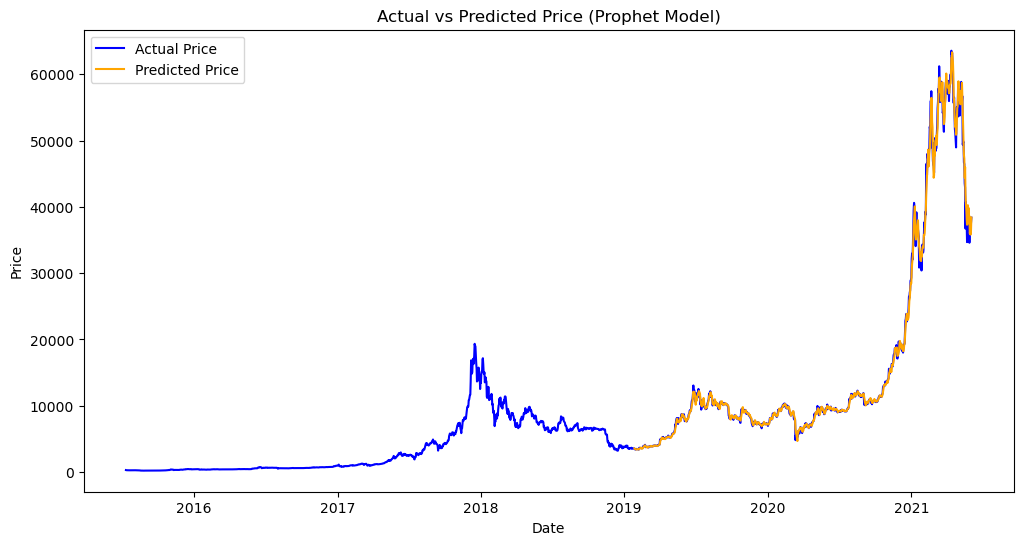

Mean Absolute Error (MAE): 410.5778237973147
Mean Squared Error (MSE): 614985.8506067212
Root Mean Squared Error (RMSE): 784.2103356923583
R-squared (R²): 0.9974835708145463


{'MAE': 410.5778237973147,
 'MSE': 614985.8506067212,
 'RMSE': 784.2103356923583,
 'R²': 0.9974835708145463}

In [80]:
functions.plot_actual_vs_predicted(df_combined, predictions_fbp_f)
functions.calculate_metrics(test_fbp_f['y'], predictions_fbp_f['yhat'])

In [81]:
functions.expanding_window_cv_prophet(df=df_combined, regressors=['EMA_7_days', 'lag5_open', 'lag1_vol'], 
                                      initial_train_size=int(len(df_ma) * 0.5),
                                      test_size=90
)

23:16:37 - cmdstanpy - INFO - Chain [1] start processing
23:16:38 - cmdstanpy - INFO - Chain [1] done processing
23:16:38 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-09-24 00:00:00: RMSE = 703.4460214610147, MAE = 540.645767565594


23:16:38 - cmdstanpy - INFO - Chain [1] done processing
23:16:38 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-12-23 00:00:00: RMSE = 208.10824161718415, MAE = 150.54383918188609


23:16:38 - cmdstanpy - INFO - Chain [1] done processing
23:16:38 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-03-23 00:00:00: RMSE = 197.4848317488841, MAE = 182.1961376285862


23:16:38 - cmdstanpy - INFO - Chain [1] done processing
23:16:38 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-21 00:00:00: RMSE = 223.63422670705, MAE = 159.249958744717


23:16:39 - cmdstanpy - INFO - Chain [1] done processing
23:16:39 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-09-19 00:00:00: RMSE = 391.02111949281596, MAE = 308.0655990165076


23:16:39 - cmdstanpy - INFO - Chain [1] done processing
23:16:39 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-12-18 00:00:00: RMSE = 281.41147407075255, MAE = 221.68231599563663


23:16:39 - cmdstanpy - INFO - Chain [1] done processing
23:16:39 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-03-17 00:00:00: RMSE = 309.7709196567692, MAE = 227.202481433022


23:16:40 - cmdstanpy - INFO - Chain [1] done processing
23:16:40 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-15 00:00:00: RMSE = 279.170821599041, MAE = 212.91326718018237


23:16:40 - cmdstanpy - INFO - Chain [1] done processing
23:16:40 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-09-13 00:00:00: RMSE = 214.9180170502813, MAE = 145.0261186041939


23:16:41 - cmdstanpy - INFO - Chain [1] done processing
23:16:41 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-12-12 00:00:00: RMSE = 375.1638347312107, MAE = 253.3969506701847


23:16:41 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-03-12 00:00:00: RMSE = 1592.4711360743338, MAE = 1255.9000798041097

Average RMSE: 434.2364222008489
Average MAE: 332.4384105295109


(434.2364222008489,
 332.4384105295109,
 [703.4460214610147,
  208.10824161718415,
  197.4848317488841,
  223.63422670705,
  391.02111949281596,
  281.41147407075255,
  309.7709196567692,
  279.170821599041,
  214.9180170502813,
  375.1638347312107,
  1592.4711360743338],
 [540.645767565594,
  150.54383918188609,
  182.1961376285862,
  159.249958744717,
  308.0655990165076,
  221.68231599563663,
  227.202481433022,
  212.91326718018237,
  145.0261186041939,
  253.3969506701847,
  1255.9000798041097])

In [82]:
df_combined.to_csv('df_combined.csv', index=False)

In [83]:
df_combined.head()

,ds,y,open,high,low,vol.,change %,lag1_y,lag1_open,lag1_vol,lag1_change_pct,lag2_y,lag2_open,lag2_vol,lag2_change_pct,lag3_y,lag3_open,lag3_vol,lag3_change_pct,lag4_y,lag4_open,lag4_vol,lag4_change_pct,lag5_y,lag5_open,lag5_vol,lag5_change_pct,lag6_y,lag6_open,lag6_vol,lag6_change_pct,lag7_y,lag7_open,lag7_vol,lag7_change_pct,SMA_7_days,EMA_7_days,SMA_1_month,EMA_1_month,SMA_3_months,EMA_3_months,SMA_6_months,EMA_6_months
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.4000,0.0,310.400000,0.0,310.400000,0.0,310.400000
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.4000,0.0,309.109677,0.0,309.960440,0.0,310.179006
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.8000,0.0,307.683247,0.0,309.455815,0.0,309.922884
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,287.0,290.4,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.4500,0.0,306.116586,0.0,308.883159,0.0,309.629813
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,283.4,287.0,59580.0,-1.23,287.0,290.4,60620.0,-1.17,290.4,310.4,146850.0,-6.47,310.4,292.0,120700.0,6.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.4875,0.0,304.212290,0.0,308.173639,0.0,309.264843
